<a href="https://colab.research.google.com/github/renemorenow/MachineLearning2/blob/main/Prog_Basica_Python/Guia_2_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Abrir en Github](https://github.com/renemorenow/MachineLearning2/blob/main/Prog_Basica_Python/Guia_2_Entrega.ipynb) ☝


#Integrantes

Andersson Camilo Ordoñez Ruiz. Cédula de ciudadanía: 1061750759

Miguel Felipe Corredor Montejo. Cédula de ciudadanía: 1098794311

William Rene Moreno Romero. Cédula de ciudadanía: 74329638

# **Guía 2**

Objetivo: aplicar los conceptos de Pandas en la manipulación y análisis de datos estructurados. Se trabajará con Series y DataFrames, aplicando técnicas de acceso, selección, filtrado y agregación de datos.

### **Caso de Negocio: Análisis de Deserción de Clientes en una Empresa de Telecomunicaciones**

**Contexto**

En la industria de las telecomunicaciones, la retención de clientes es un factor crítico para la sostenibilidad del negocio. La competencia es feroz y adquirir nuevos clientes suele ser más costoso que mantener a los actuales. En este análisis, exploraremos un conjunto de datos que contiene información detallada sobre clientes que han abandonado el servicio (churn) y aquellos que permanecen activos.

Nuestro objetivo es identificar los factores clave que influyen en la deserción, comprender patrones de comportamiento y generar estrategias efectivas para reducir la tasa de abandono.

La empresa ha experimentado un aumento en la tasa de deserción de clientes, lo que ha provocado:
- Pérdida de ingresos recurrentes.
- Incremento en los costos de adquisición de nuevos clientes.
- Menor estabilidad en la base de clientes a largo plazo.

Para abordar esta problemática, es crucial identificar las razones detrás de la deserción y desarrollar estrategias para mejorar la retención de clientes.



**Entrega del Trabajo**

Los estudiantes deben trabajar en grupos de entre 2 y 4 personas. Cada grupo deberá subir su trabajo a un repositorio de GitHub, asegurándose de que el código y los archivos necesarios estén bien organizados y documentados. Posteriormente, deberán enviar el enlace del repositorio en la plataforma Canvas para su evaluación.

Instrucciones para la entrega:

Crear un repositorio en GitHub con un nombre descriptivo para el proyecto.

Subir el código en Jupyter Notebook (.ipynb) o en formato Python (.py).

Incluir un archivo README.md con una breve descripción del trabajo y las instrucciones de ejecución.

Compartir el enlace del repositorio en Canvas dentro del plazo establecido.



**Descripción de las variables del dataset telecom_churn**

El dataset telecom_churn contiene información detallada sobre clientes de una empresa de telecomunicaciones, incluyendo datos generales, planes contratados, uso del servicio telefónico y llamadas al servicio al cliente. Su propósito principal es analizar patrones de deserción de clientes, identificados a través de la variable churn, que indica si un cliente ha abandonado la empresa (1) o sigue siendo cliente (0).

Dentro del dataset, encontramos información general como el estado (state) donde reside el cliente, el código de área (area code), y el número de teléfono (phone number), aunque esta última variable no aporta información útil para el análisis, ya que es un identificador único.

Además, el dataset registra el tiempo que un cliente ha estado en la empresa a través de la variable account length, lo que puede ayudar a analizar si la duración del contrato influye en la deserción. También se incluyen detalles sobre los planes contratados, como si el cliente tiene un plan internacional (international plan), que le permite realizar llamadas internacionales, o un buzón de voz (voice mail plan), que le permite recibir mensajes de voz.

En cuanto al uso del servicio, se registran datos detallados sobre el tiempo en llamadas y los costos asociados. Se divide en tres períodos del día: diurno (total day minutes, total day calls, total day charge), vespertino (total eve minutes, total eve calls, total eve charge) y nocturno (total night minutes, total night calls, total night charge), lo que permite evaluar si hay patrones de consumo que influyen en la deserción. También se incluye información sobre el uso del servicio internacional, con variables como total intl minutes (minutos en llamadas internacionales), total intl calls (cantidad de llamadas internacionales) y total intl charge (costos por llamadas internacionales).

Otro aspecto clave del dataset es el número de llamadas al servicio al cliente (customer service calls), ya que una mayor cantidad de llamadas puede indicar insatisfacción y estar relacionada con la decisión del cliente de abandonar la empresa.

Finalmente, la variable más importante del análisis es churn, que indica si un cliente ha desertado de la empresa. A partir de esta variable, podemos analizar qué factores influyen en la deserción y encontrar patrones en los clientes que tienen mayor probabilidad de abandonar el servicio.


## **Exploración y Limpieza de Datos**

Cargar y explorar el dataset

Importa Pandas y carga el dataset telecom_churn.csv en un DataFrame.

Muestra las primeras 5 filas del DataFrame.

Verifica cuántas filas y columnas tiene el dataset.

Muestra información general del dataset, incluyendo los tipos de datos.

Identifica si hay valores nulos en alguna columna.

In [ ]:
# Solución propuesta

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
url = 'https://raw.githubusercontent.com/renemorenow/MachineLearning2/refs/heads/main/telecom_churn.csv'
df = pd.read_csv(url, index_col=0)

In [5]:
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Cantidad de filas y columnas del DF
df.shape

(3333, 20)

In [7]:
#tipos de datos del DF:
df.dtypes

,0
account length,int64
area code,int64
phone number,object
international plan,object
voice mail plan,object
number vmail messages,int64
total day minutes,float64
total day calls,int64
total day charge,float64
total eve minutes,float64


In [8]:
#cantidad de nulos por columna
df.isnull().sum()

,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0


## **Análisis de Churn y Factores Relacionados**

Calcula el porcentaje de clientes que han desertado (churn = 1).

Identifica si los clientes con plan internacional (international plan) tienen mayor tasa de deserción.

Identifica si los clientes con buzón de voz (voice mail plan) tienen menor tasa de deserción.

### Calcula el porcentaje de clientes que han desertado (churn = 1):

In [9]:
# Solución propuesta

#porcentaje de clientes que desertaron:
PorcentajeDeserciones=(df['churn'] == 1).mean()*100
print(f"El porcentaje de clientes que desertaron es: {PorcentajeDeserciones:.2f}%")

El porcentaje de clientes que desertaron es: 14.49%


### Identifica si los clientes con plan internacional (international plan) tienen mayor tasa de deserción:

In [10]:
#identificar si los clientes con plan internacional tienen mayor tasa de desercion

#Identificacion de Dataframes con plan internacional y nacional
PlanInternacional = df[df['international plan'] == 'yes']
PlanNacional = df[df['international plan'] == 'no']


#Calculo de tasa de desercion
DesercionInternacional = (PlanInternacional['churn'] == 1).mean()*100
DesercionNacional = (PlanNacional['churn'] == 1).mean()*100


#Resultados
print(f"El porcentaje de clientes con plan internacional que desertaron es: {DesercionInternacional:.2f}%")
print(f"El porcentaje de clientes con plan nacional que desertaron es: {DesercionNacional:.2f}%")


El porcentaje de clientes con plan internacional que desertaron es: 42.41%
El porcentaje de clientes con plan nacional que desertaron es: 11.50%


### Identifica si los clientes con buzón de voz (voice mail plan) tienen menor tasa de deserción:

In [11]:
#Desercion de clientes con buzon de voz

#Identificacion de Dataframes con plan internacional y nacional
BuzonVoz = df[df['voice mail plan'] == 'yes']
SinBuzonVoz = df[df['voice mail plan'] == 'no']

#Calculo de probabilidades
DesercionBuzonVoz = (BuzonVoz['churn'] == 1).mean()*100
DesercionSinBuzonVoz = (SinBuzonVoz['churn'] == 1).mean()*100
#Resultados
print(f"El porcentaje de clientes con buzon de voz que desertaron es: {DesercionBuzonVoz:.2f}%")
print(f"El porcentaje de clientes sin buzon de voz que desertaron es: {DesercionSinBuzonVoz:.2f}%")

El porcentaje de clientes con buzon de voz que desertaron es: 8.68%
El porcentaje de clientes sin buzon de voz que desertaron es: 16.72%


## **Análisis de la Duración del Servicio y Deserción**

¿Cuál es la duración promedio de la cuenta (account length) entre clientes que desertaron y los que permanecen?

¿Los clientes con cuentas más antiguas tienen más probabilidades de desertar?

### ¿Cuál es la duración promedio de la cuenta (account length) entre clientes que desertaron y los que permanecen?

In [12]:
# Duracion promedio de la cuenta

#Identificacion de dataframes de acuerdo a los usuarios que han desertado
UsuariosDesertores = df[df['churn'] == 1]
UsuariosActivos = df[df['churn'] == 0]

#Calculo de la duracion promedio
DuracionPromedioDesertores = UsuariosDesertores['account length'].mean()
DuracionPromedioActivos = UsuariosActivos['account length'].mean()

#Resultados
print(f"La duracion promedio de la cuenta de los usuarios que desertaron es: {DuracionPromedioDesertores:.2f} dias")
print(f"La duracion promedio de la cuenta de los usuarios que estan activos es: {DuracionPromedioActivos:.2f} dias")


La duracion promedio de la cuenta de los usuarios que desertaron es: 102.66 dias
La duracion promedio de la cuenta de los usuarios que estan activos es: 100.79 dias


## **Relación entre Deserción y Uso del Servicio**

Compara la cantidad de minutos usados en llamadas diurnas (total day minutes) entre clientes con y sin churn.

Compara la cantidad de minutos usados en llamadas nocturnas (total night minutes).

Compara el número total de llamadas (total day calls) entre clientes con y sin churn.

### Compara la cantidad de minutos usados en llamadas diurnas (total day minutes) entre clientes con y sin churn:

In [13]:
#Cantidad de minutos consumidos en llamadas diurnas:
MinutosDesertores = UsuariosDesertores['total day minutes'].sum()
MinutosActivos = UsuariosActivos['total day minutes'].sum()

#Resultados:
print(f"Cantidad de minutos consumidos en llamadas diurnas entre los usuarios que desertaron es: {MinutosDesertores:.2f} minutos")
print(f"Cantidad de minutos consumidos en llamadas diurnas entre los usuarios que estan activos es: {MinutosActivos:.2f} minutos")

Cantidad de minutos consumidos en llamadas diurnas entre los usuarios que desertaron es: 99939.50 minutos
Cantidad de minutos consumidos en llamadas diurnas entre los usuarios que estan activos es: 499250.90 minutos


### Compara la cantidad de minutos usados en llamadas nocturnas (total night minutes):

In [14]:
#Cantidad de minutos consumidos en llamadas nocturnas:
MinutosDesertores = UsuariosDesertores['total night minutes'].sum()
MinutosActivos = UsuariosActivos['total night minutes'].sum()

print(f"Cantidad de minutos consumidos en llamadas nocturnas entre los usuarios que desertaron es: {MinutosDesertores:.2f} minutos")
print(f"Cantidad de minutos consumidos en llamadas nocturnas entre los usuarios que estan activos es: {MinutosActivos:.2f} minutos")


#Cantidad total de minutos en llamadas nocturnas:
PromedioLlamadasNocturnas = df['total night calls'].sum()
print(f"Cantidad de minutos de llamadas nocturnas entre los usuarios que estan activos es: {PromedioLlamadasNocturnas:.2f} minutos")

Cantidad de minutos consumidos en llamadas nocturnas entre los usuarios que desertaron es: 99126.90 minutos
Cantidad de minutos consumidos en llamadas nocturnas entre los usuarios que estan activos es: 570379.60 minutos
Cantidad de minutos de llamadas nocturnas entre los usuarios que estan activos es: 333659.00 minutos


### Compara el número total de llamadas (total day calls) entre clientes con y sin churn (Desertores y No Desertores):

In [15]:
#Total de llamadas entre clientes activos y desertores
LlamadasDesertores = UsuariosDesertores['total day calls'].sum()
LlamadasActivos = UsuariosActivos['total day calls'].sum()

#Resultado:
print(f"Cantidad de llamadas entre los usuarios que desertaron es: {LlamadasDesertores} llamadas")
print(f"Cantidad de llamadas entre los usuarios que estan activos es: {LlamadasActivos} llamadas")

Cantidad de llamadas entre los usuarios que desertaron es: 48945 llamadas
Cantidad de llamadas entre los usuarios que estan activos es: 285807 llamadas


## **Impacto de las Llamadas al Servicio al Cliente en la Deserción**

Calcula el número promedio de llamadas al servicio al cliente (customer service calls) entre clientes que desertaron y los que no.

Divide los clientes en dos grupos:

- Grupo 1: Clientes que llamaron más de 3 veces al servicio al cliente.
- Grupo 2: Clientes que llamaron 3 veces o menos.
Compara la tasa de churn entre ambos grupos.

### número promedio de llamadas al servicio al cliente (customer service calls) entre clientes que desertaron y los que no.

In [16]:
# Solución propuesta

# Calcular el número promedio de llamadas al servicio al cliente
promedio_desertaron = UsuariosDesertores['customer service calls'].mean()
promedio_permanecen = UsuariosActivos['customer service calls'].mean()

# Mostrar los resultados
print(f'Número promedio de llamadas al servicio al cliente de los clientes que desertaron: {promedio_desertaron:.2f} llamadas')
print(f'Número promedio de llamadas al servicio al cliente de los clientes que permanecen: {promedio_permanecen:.2f} llamadas')

Número promedio de llamadas al servicio al cliente de los clientes que desertaron: 2.23 llamadas
Número promedio de llamadas al servicio al cliente de los clientes que permanecen: 1.45 llamadas


### Divide los clientes en dos grupos:
- Grupo 1: Clientes que llamaron más de 3 veces al servicio al cliente.
- Grupo 2: Clientes que llamaron 3 veces o menos.

Compara la tasa de churn entre ambos grupos.

In [17]:
# Solución propuesta

# Dividir a los clientes en dos grupos según el número de llamadas al servicio al cliente
grupo_1 = df[df['customer service calls'] > 3]  # Llamaron más de 3 veces
grupo_2 = df[df['customer service calls'] <= 3]  # Llamaron 3 veces o menos

# Calcular la tasa de churn para cada grupo
tasa_churn_grupo_1 = (grupo_1['churn'] == 1).mean()  # Porcentaje de desertores en grupo 1
tasa_churn_grupo_2 = (grupo_2['churn'] == 1).mean()  # Porcentaje de desertores en grupo 2

# Mostrar las tasas de churn
print(f'Tasa de desertores para el Grupo 1 (más de 3 llamadas): {tasa_churn_grupo_1 * 100:.2f}%')
print(f'Tasa de desertores para el Grupo 2 (3 llamadas o menos): {tasa_churn_grupo_2 * 100:.2f}%')

print('\nEl Grupo 1 (clientes que llamaron más de 3 veces) tiene una tasa de desertores significativamente más alta que el Grupo 2 (clientes que llamaron 3 veces o menos),\npodría indicar que un mayor número de llamadas al servicio al cliente está relacionado con una mayor probabilidad de deserción.')

Tasa de desertores para el Grupo 1 (más de 3 llamadas): 51.69%
Tasa de desertores para el Grupo 2 (3 llamadas o menos): 11.25%

El Grupo 1 (clientes que llamaron más de 3 veces) tiene una tasa de desertores significativamente más alta que el Grupo 2 (clientes que llamaron 3 veces o menos),
podría indicar que un mayor número de llamadas al servicio al cliente está relacionado con una mayor probabilidad de deserción.


## **Análisis del Costo de las Llamadas y Churn**

Compara el costo total de llamadas diurnas (total day charge) entre clientes con y sin churn.

Compara el costo total de llamadas nocturnas (total night charge).

¿Los clientes con mayor gasto en llamadas internacionales (total intl charge) tienen más probabilidades de desertar?

### Compara el costo total de llamadas diurnas (total day charge) entre clientes con y sin churn:

Costo promedio de llamadas diurnas de los clientes que desertaron: $35.18
Costo promedio de llamadas diurnas de los clientes que permanecen: $29.78


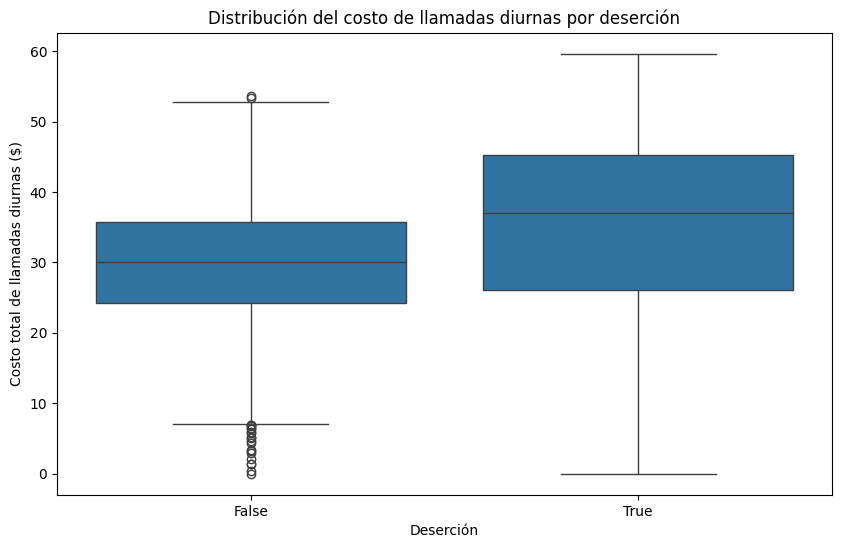

In [18]:
# Solución propuesta

# Calcular la media del costo total de las llamadas diurnas para ambos grupos
promedio_costo_desertaron = UsuariosDesertores['total day charge'].mean()
promedio_costo_permanecen = UsuariosActivos['total day charge'].mean()

# Mostrar los resultados
print(f'Costo promedio de llamadas diurnas de los clientes que desertaron: ${promedio_costo_desertaron:.2f}')
print(f'Costo promedio de llamadas diurnas de los clientes que permanecen: ${promedio_costo_permanecen:.2f}')

# Visualización para comparar la distribución de los costos entre ambos grupos
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=df)
plt.title('Distribución del costo de llamadas diurnas por deserción')
plt.xlabel('Deserción')
plt.ylabel('Costo total de llamadas diurnas ($)')
plt.show()

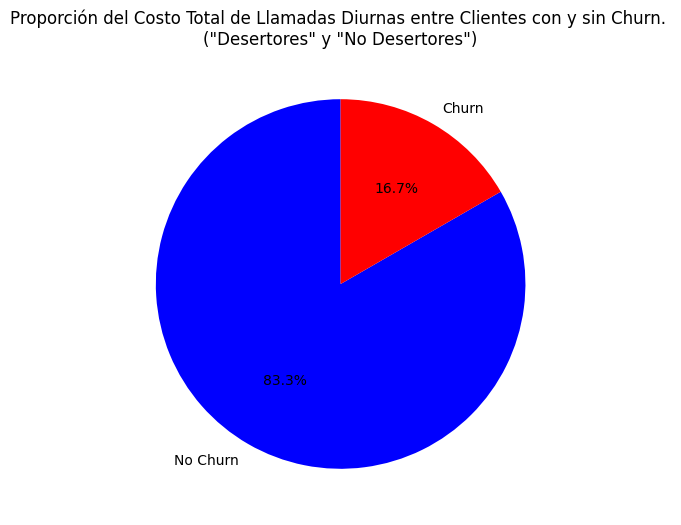

T-Statistic: 9.6845, P-Value: 0.0000
Hay una diferencia estadísticamente significativa en el costo total de llamadas diurnas entre clientes con y sin churn.


In [25]:
# Separar los datos en churn y no churn
churn_yes = df[df['churn'] == True]['total day charge']
churn_no = df[df['churn'] == False]['total day charge']

# Sumar el total de cargos diurnos para cada grupo (churn vs no churn)
total_charge_by_churn = df.groupby('churn')['total day charge'].sum()

# Gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(total_charge_by_churn, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Proporción del Costo Total de Llamadas Diurnas entre Clientes con y sin Churn. \n("Desertores" y "No Desertores")')
plt.show()

# Prueba de hipótesis (t-test)
t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)
print(f'T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}')

# Interpretación del resultado
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en el costo total de llamadas diurnas entre clientes con y sin churn.")
else:
    print("No hay evidencia suficiente para afirmar que exista una diferencia significativa en el costo total de llamadas diurnas entre clientes con y sin churn.")

Interpretación:

Si el costo total de las llamadas diurnas es mayor en los clientes que desertaron, podría indicar que los clientes que gastan más en llamadas están más inclinados a abandonar el servicio.

Si no hay una diferencia significativa, entonces el costo de las llamadas diurnas no parecería ser un factor decisivo en la deserción de los clientes.

### Compara el costo total de llamadas nocturnas (total night charge).

Costo promedio de llamadas nocturnas de los clientes que desertaron: $9.24
Costo promedio de llamadas nocturnas de los clientes que permanecen: $9.01


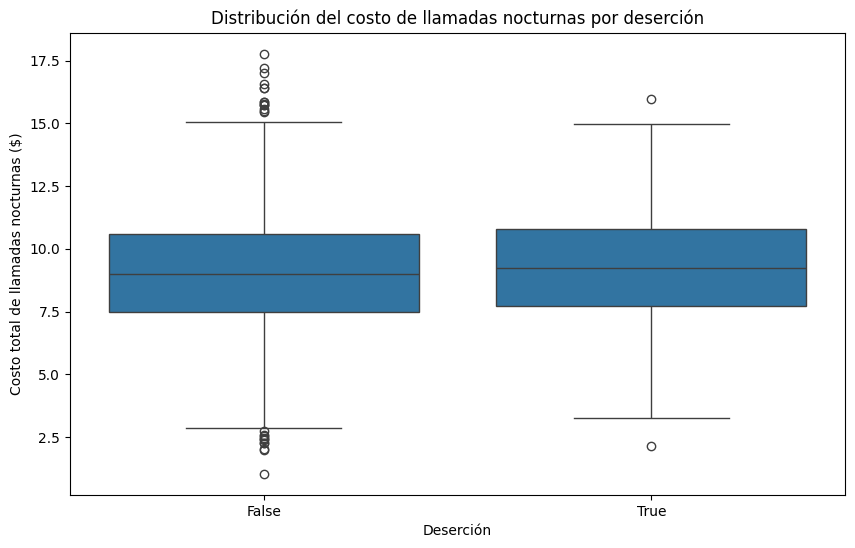

In [ ]:
# Solución propuesta

# Calcular la media del costo total de las llamadas nocturnas para ambos grupos
promedio_costo_nocturno_desertaron = UsuariosDesertores['total night charge'].mean()
promedio_costo_nocturno_permanecen = UsuariosActivos['total night charge'].mean()

# Mostrar los resultados
print(f'Costo promedio de llamadas nocturnas de los clientes que desertaron: ${promedio_costo_nocturno_desertaron:.2f}')
print(f'Costo promedio de llamadas nocturnas de los clientes que permanecen: ${promedio_costo_nocturno_permanecen:.2f}')

# Visualización para comparar la distribución de los costos entre ambos grupos
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total night charge', data=df)
plt.title('Distribución del costo de llamadas nocturnas por deserción')
plt.xlabel('Deserción')
plt.ylabel('Costo total de llamadas nocturnas ($)')
plt.show()

Interpretación:

Si el costo total de las llamadas nocturnas es más alto en los clientes que desertaron, podría sugerir que los clientes con mayor gasto en llamadas nocturnas están más inclinados a abandonar el servicio.

Si no hay una diferencia significativa, entonces el costo de las llamadas nocturnas no parecería ser un factor relevante para la deserción de los clientes.